## EN2550 Assignment 1 on Intensity Transformations and Neighborhood Filtering

190574U </br> Induwara Senadheera

256


Text(0.5, 1.0, 'Tranformed Image')

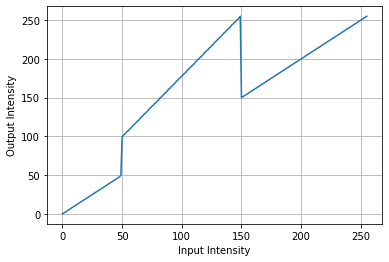

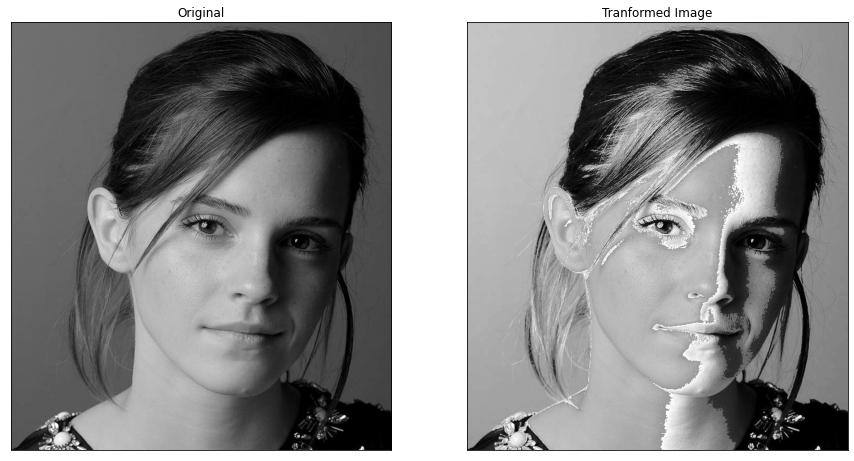

In [48]:
# Question 1
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'./Images/emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert cv is not None

t1=np.linspace(0,50,50)
t2=np.linspace(100,255,100)
t3=np.linspace(150,255,106)

t=np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
print(len(t))
fig,ax=plt.subplots()
assert len(t) ==256
ax.plot(t)
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
ax.grid(True)
g=cv.LUT(im,t)#look up table
#g=t[cv]

fig,ax=plt.subplots(1,2,figsize=(15,11))
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[0].imshow(im,"gray")
ax[0].set_title('Original')
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[1].imshow(g,"gray")
ax[1].set_title('Tranformed Image')






Text(0.5, 1.0, 'Gray matter')

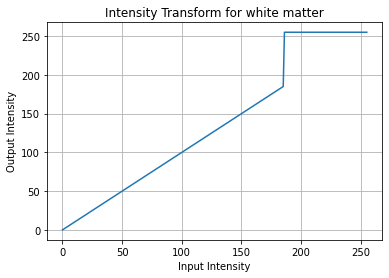

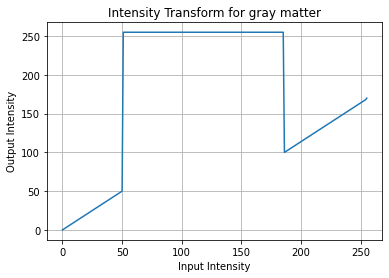

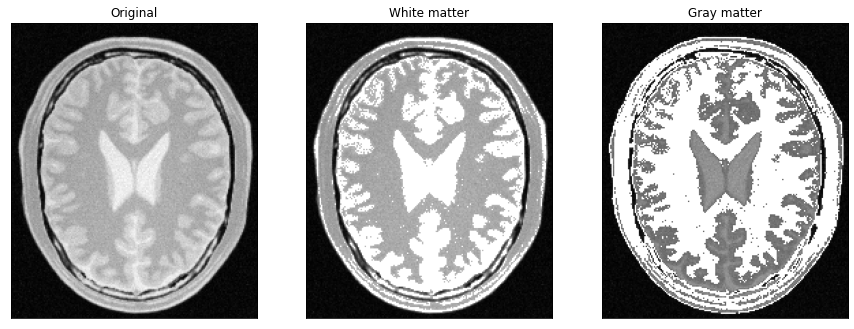

In [49]:
# Question 2
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'./Images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert cv is not None

t1=np.linspace(0,185,186)
t2=np.linspace(255,255,70)

t=np.concatenate((t1,t2),axis=0).astype(np.uint8)

fig,ax=plt.subplots()
assert len(t) ==256
ax.plot(t)
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
ax.grid(True)
ax.set_title('Intensity Transform for white matter')
white=cv.LUT(im,t)


t1=np.linspace(0,50,51)
t2=np.linspace(255,255,135)
t3=np.linspace(100,170,70)

t=np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
fig,ax=plt.subplots()
assert len(t) ==256
ax.plot(t)
ax.set_title('Intensity Transform for gray matter')
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
ax.grid(True)
graym=cv.LUT(im,t)

fig,ax=plt.subplots(1,3,figsize=(15,11))
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[0].imshow(im,"gray")
ax[0].set_title('Original')
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[1].imshow(white,"gray")
ax[1].set_title('White matter')
ax[2].set_xticks([]), ax[2].set_yticks([])
ax[2].imshow(graym,"gray")
ax[2].set_title('Gray matter')

([], [])

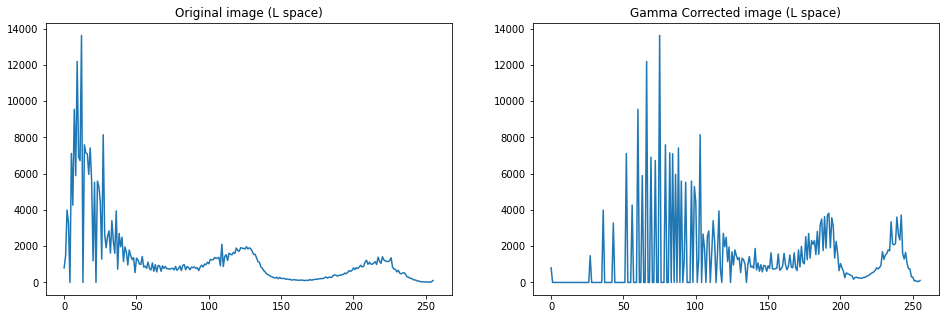

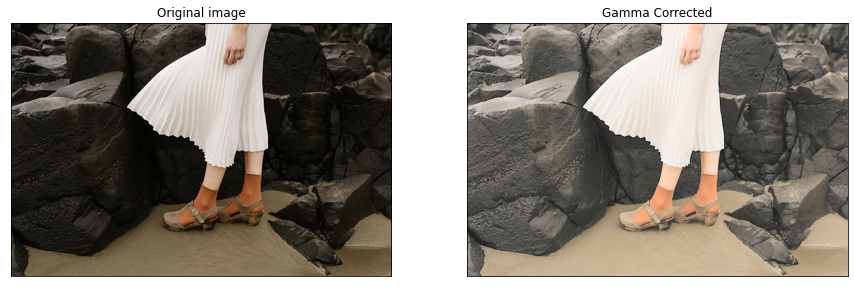

In [53]:
# Question 3
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'./Images/highlights_and_shadows.jpg')
assert im is not None
im_=cv.cvtColor(im,cv.COLOR_BGR2Lab)
L, a, b = cv.split(im_)

gamma=0.4
t=np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
Ll=cv.LUT(L,t)

hist_im=cv.calcHist([L],[0],None,[256],[0,256])
hist_img2=cv.calcHist([Ll],[0],None,[256],[0,256])

fig,ax=plt.subplots(1,2,figsize=(16,5))
ax[0].plot(hist_im)
ax[0].set_title('Original image (L space)')
ax[1].plot(hist_img2)
ax[1].set_title('Gamma Corrected image (L space)')

final_Lab = cv.merge((Ll, a, b))
img2 = cv.cvtColor(final_Lab, cv.COLOR_Lab2BGR)

fig,ax=plt.subplots(1,2,figsize=(15,11))
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title('Original image')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].set_title('Gamma Corrected')
ax[1].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[1].set_xticks([]), ax[1].set_yticks([])


([], [])

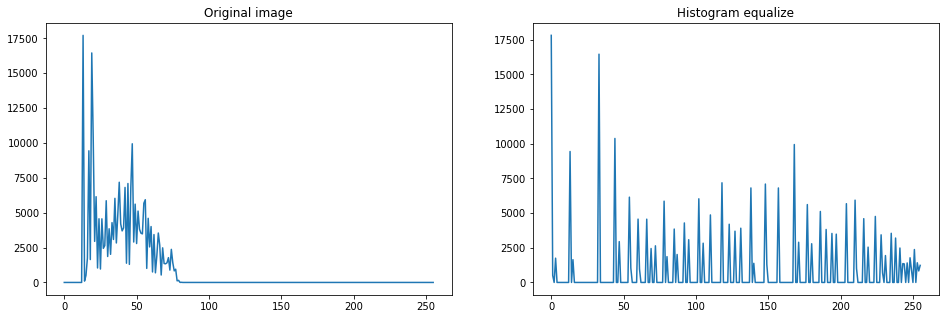

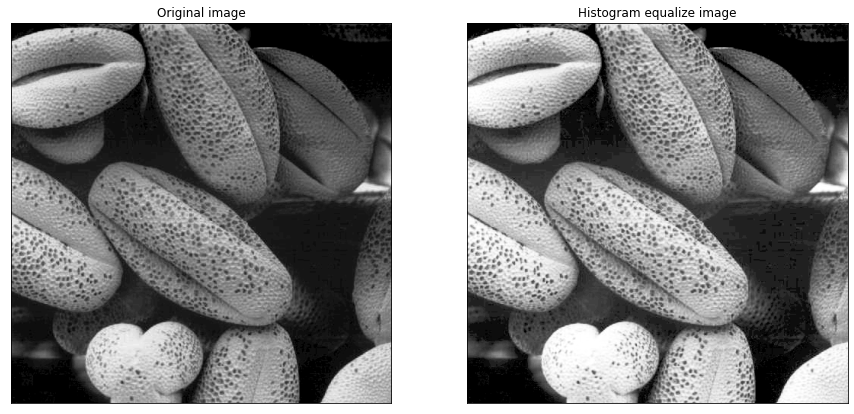

In [54]:
# Question 4
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f=cv.imread(r'./Images/shells.png',cv.IMREAD_GRAYSCALE)
assert f is not None

hist_f=cv.calcHist([f],[0],None,[256],[0,256])
g=cv.equalizeHist(f)
hist_g=cv.calcHist([g],[0],None,[256],[0,256])

fig,ax=plt.subplots(1,2,figsize=(16,5))
ax[0].plot(hist_f)
ax[0].set_title('Original image')
ax[1].plot(hist_g)
ax[1].set_title('Histogram equalize')

fig,ax=plt.subplots(1,2,figsize=(15,11))
ax[0].imshow(f,"gray")
ax[0].set_title('Original image')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].set_title('Histogram equalize image')
ax[1].imshow(g,"gray")
ax[1].set_xticks([]), ax[1].set_yticks([])

40.02108265817901


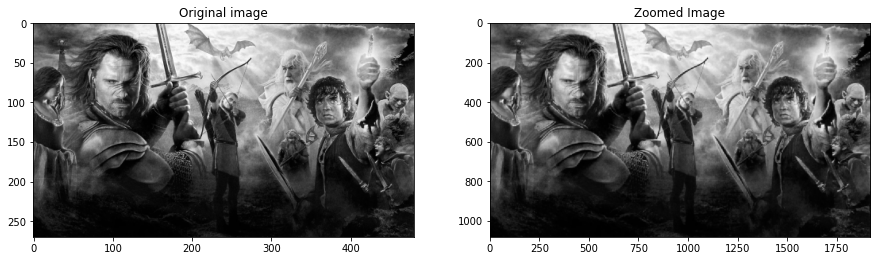

In [1]:
# Question 5 a
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'./Images/im01small.png',cv.IMREAD_GRAYSCALE)
scale=4
im2=cv.imread(r'./Images/im01.png',cv.IMREAD_GRAYSCALE)

def nearest_neighbor(im,scale):
    rows=int(scale*im.shape[0])
    cols=int(scale*im.shape[1])

    zoomed=np.zeros((rows,cols),dtype=im.dtype)
    for r in range(rows):
        for c in range(cols):
            #print(r,c)
            rr=round(r/scale)
            cc=round(c/scale)
            if (rr<im.shape[0] and cc<im.shape[1]):
                zoomed[r,c]=im[rr,cc]
            elif(rr<im.shape[0]):
                zoomed[r,c]=im[rr,cc-1]
            elif(cc<im.shape[1]):
                zoomed[r,c]=im[rr-1,cc]
            else:
                zoomed[r,c]=im[rr-1,cc-1]

    return zoomed
    
def SSD(original_img,zoomed_img):
    return np.square(original_img-zoomed_img).sum()/(original_img.shape[0]*original_img.shape[1])

zoomed=nearest_neighbor(im,scale)
print(SSD(im2,zoomed))
cv.namedWindow('Original',cv.WINDOW_AUTOSIZE)
cv.imshow('Original',im)
cv.waitKey(0)

cv.namedWindow('Zoomed',cv.WINDOW_AUTOSIZE)
cv.imshow('Zoomed',zoomed)
cv.waitKey(0)


cv.imwrite('nearest_original.png', im)
cv.imwrite('nearest_out.png', zoomed)

cv.destroyAllWindows()

fig,ax=plt.subplots(1,2,figsize=(15,11))
ax[0].imshow(im,"gray")
ax[0].set_title('Original image')
#ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].set_title('Zoomed Image')
ax[1].imshow(zoomed,"gray")
#ax[1].set_xticks([]), ax[1].set_yticks([])

39.25260609567901


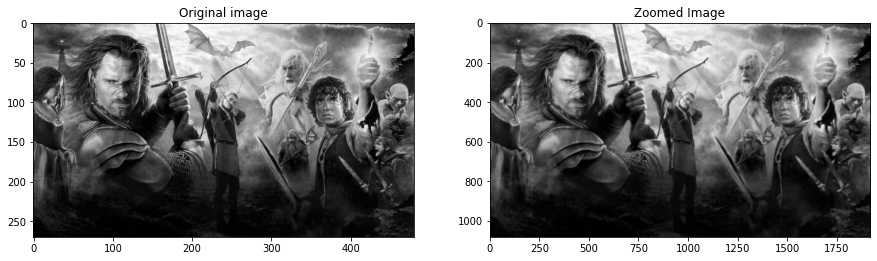

In [12]:
# Question 5b
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'./Images/im01small.png',cv.IMREAD_GRAYSCALE)
im2=cv.imread(r'./Images/im01.png',cv.IMREAD_GRAYSCALE)
scale=4

def bilinear(im,scale):
    rows=int(scale*im.shape[0])
    cols=int(scale*im.shape[1])
    zoomed=np.zeros((rows,cols),dtype=im.dtype)
    width=im.shape[0]
    height=im.shape[1]
    for x in range(rows):
        for y in range(cols):
            x_ = x/scale # Coordinates in old image
            y_ = y/scale
            x1 = min(int(np.floor(x_)), width-1)# Finding neighboring points
            y1 = min(int(np.floor(y_)), height-1)
            x2 = min(int(np.ceil(x_)), width-1)
            y2 = min(int(np.ceil(y_)), height-1)
            Q11 = im[x1, y1]
            Q12 = im[x2, y1]
            Q21 = im[x1, y2]
            Q22 = im[x2, y2]
            P1 = (x2-x_)*Q11 + (x_-x1)*Q12# Interpolating P1 and P2
            P2 = (x2-x_)*Q21 + (x_-x1)*Q22
            if x1 == x2:
              P1 = Q11
              P2 = Q22
            P = (y2-y_)*P1 + (y_-y1)*P2# Interpolating P
            if y1 == y2:
                P = P1
            zoomed[x,y]=int(P)# Rounding P to an int tuple
    return zoomed

def SSD(original_img,zoomed_img):
    return np.square(original_img-zoomed_img).sum()/(original_img.shape[0]*original_img.shape[1])

zoomed=bilinear(im,scale)
print(SSD(im2,zoomed))
cv.namedWindow('Original',cv.WINDOW_AUTOSIZE)
cv.imshow('Original',im)
cv.waitKey(0)

cv.namedWindow('Zoomed',cv.WINDOW_AUTOSIZE)
cv.imshow('Zoomed',zoomed)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imwrite('bileanear_original.png', im)
cv.imwrite('bileanear_out.png', zoomed)

ig,ax=plt.subplots(1,2,figsize=(15,11))
ax[0].imshow(im,"gray")
ax[0].set_title('Original image')
#ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].set_title('Zoomed Image')
ax[1].imshow(zoomed,"gray")
#ax[1].set_xticks([]), ax[1].set_yticks([])

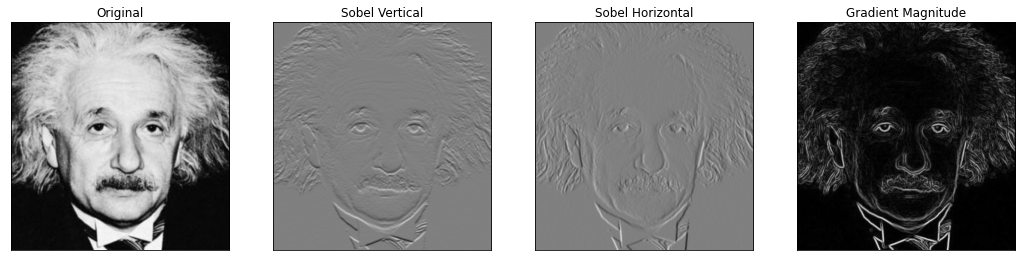

In [44]:
# Question 6a
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"./Images/einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype = np.float32)
img_x = cv.filter2D(img, -1, sobel_v)
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype = 'float')
img_y = cv.filter2D(img, -1, sobel_h)

grad_img = np.sqrt(img_x**2+img_y**2)

fig, ax = plt.subplots(1,4 , sharex = 'all' , sharey = 'all', figsize=(18,18))
ax[0].imshow(img,cmap= 'gray',vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].imshow(img_x,cmap= 'gray',vmin=-1020, vmax=1020)
ax[1].set_title('Sobel Vertical')
ax[2].imshow(img_y,cmap= 'gray',vmin=-1020, vmax=1020)
ax[2].set_title('Sobel Horizontal')
ax[3].imshow(grad_img,cmap= 'gray')
ax[3].set_title('Gradient Magnitude')

for i in range(4):
    ax[i].set_xticks([]), ax[i].set_yticks([])

plt.show()

([], [])

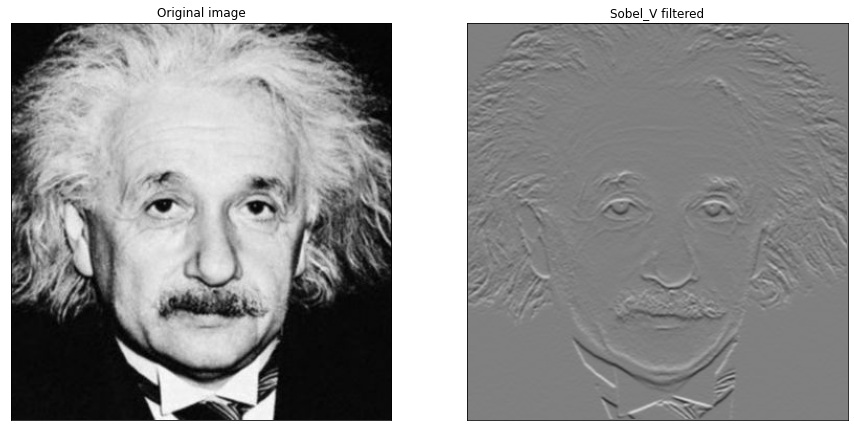

In [45]:
# Question 6b
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"./Images/einstein.png", cv.IMREAD_GRAYSCALE)#.astype(np.float32)
assert img is not None
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])# dtype = np.float32)

def padding(arr,pad_width):
    out=np.append(arr,np.zeros((pad_width,arr.shape[1])),axis=0)
    out=np.append(np.zeros((pad_width,arr.shape[1])),out,axis=0)
    out=np.append(np.zeros((out.shape[0],pad_width)),out,axis=1)
    out=np.append(out,np.zeros((out.shape[0],pad_width)),axis=1)
    return out
def filt2d(img,fil):
    pad_width=fil.shape[0]//2
    pad_img=padding(img,pad_width)
    width=pad_img.shape[0]
    height=pad_img.shape[1]

    fil = np.flipud(np.fliplr(fil))
    n=fil.shape[0]
    
    out=np.zeros((img.shape[0],img.shape[1]),dtype=np.int16)
    for r in range(pad_width,img.shape[0]-pad_width):
        for c in range(pad_width,img.shape[1]-pad_width):
            concat=pad_img[r-pad_width:r+pad_width+1,c-pad_width:c+pad_width+1]
            #print(concat.shape[1])
            #print(concat.shape,r-pad_width,r+pad_width)
            out[r,c]=np.multiply(fil,concat).sum()
    return out
        
out=filt2d(img,sobel_v)
cv.namedWindow('Original',cv.WINDOW_AUTOSIZE)
cv.imshow('Original',img)
cv.waitKey(0)

cv.namedWindow('Zoomed',cv.WINDOW_AUTOSIZE)
cv.imshow('Zoomed',out)
cv.waitKey(0)
cv.destroyAllWindows()

ig,ax=plt.subplots(1,2,figsize=(15,11))
ax[0].imshow(img,"gray")
ax[0].set_title('Original image')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].set_title('Sobel_V filtered')
ax[1].imshow(out,cmap= 'gray',vmin=-1020, vmax=1020)
ax[1].set_xticks([]), ax[1].set_yticks([])




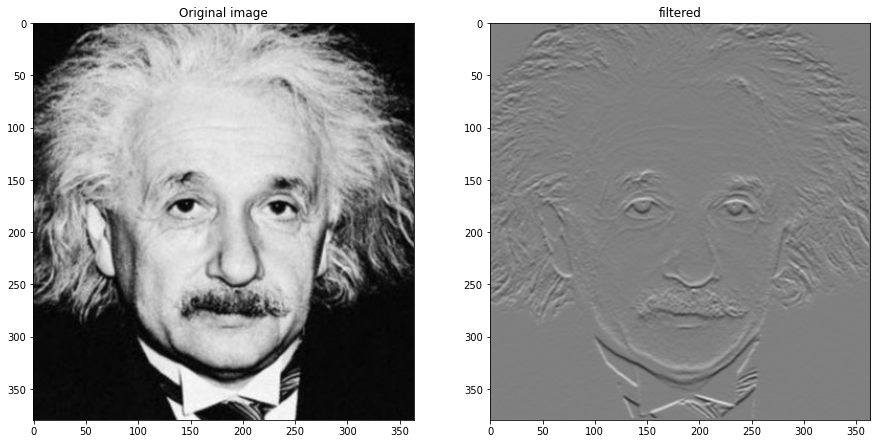

In [46]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"./Images/einstein.png", cv.IMREAD_GRAYSCALE)#.astype(np.float32)
assert img is not None
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])# dtype = np.float32)

def convolve2D(image, kernel, padding):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding)) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding)) + 1)
    output = np.zeros((xOutput, yOutput))
    

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        
        for x in range(image.shape[0]):
            # Go to next row once kernel is out of bounds
            if x > image.shape[0] - xKernShape:
                break
            try:
                output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
            except:
                break

    return output

out=convolve2D(img,sobel_v,1)
cv.namedWindow('Original',cv.WINDOW_AUTOSIZE)
cv.imshow('Original',img)
cv.waitKey(0)

cv.namedWindow('Zoomed',cv.WINDOW_AUTOSIZE)
cv.imshow('Zoomed',out)
cv.waitKey(0)
cv.destroyAllWindows()

ig,ax=plt.subplots(1,2,figsize=(15,11))
ax[0].imshow(img,"gray")
ax[0].set_title('Original image')
#ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].set_title('filtered')
#ax[1].imshow(out,"gray")
ax[1].imshow(out,cmap= 'gray',vmin=-1020, vmax=1020)


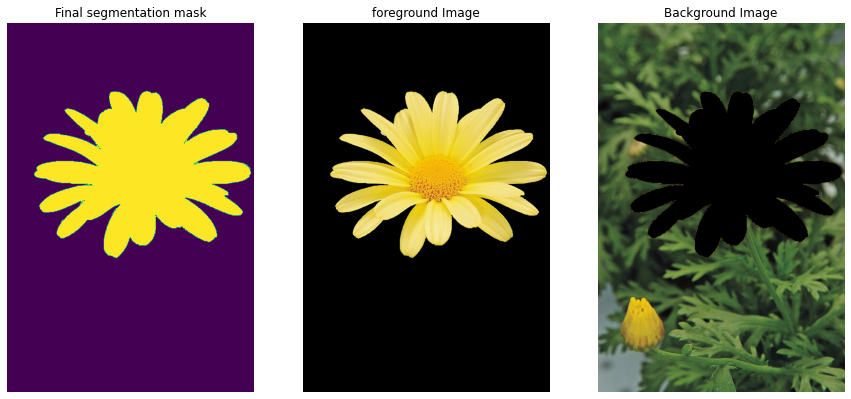

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread(r"./Images/daisy.jpg", cv.IMREAD_COLOR)
assert img is not None

mask = np.zeros(img.shape[:2],np.uint8)
bgModel = np.zeros((1,65), np.float64)
fgModel = np.zeros((1,65), np.float64)

rect= (40,150,520,400)
cv.grabCut(img,mask,rect,bgModel,fgModel,5, cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2) | (mask==0),0,1).astype('uint8')
mask3 = np.where((mask!=2) & (mask!=0),0,1).astype('uint8')
fg_img = img*mask2[:,:,np.newaxis]
bg_img = img*mask3[:,:,np.newaxis]

fig, ax = plt.subplots(1,3 , sharex = 'all' , sharey = 'all', figsize=(15,8))
ax[0].imshow(mask2)
ax[0].set_title('Final segmentation mask')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(cv.cvtColor(fg_img, cv.COLOR_RGB2BGR))
ax[1].set_title('foreground Image')
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].imshow(cv.cvtColor(bg_img, cv.COLOR_RGB2BGR))
ax[2].set_title('Background Image')
ax[2].set_xticks([]), ax[2].set_yticks([])

for i in range(3):
        ax[i].axis('off')
plt.show()

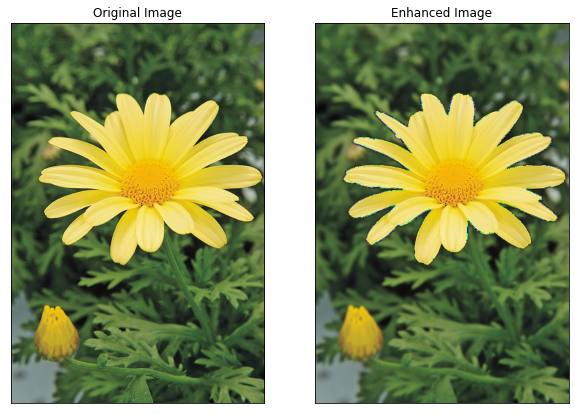

In [10]:
kernel_size=9
sigma=2

blurred_back=cv.GaussianBlur(bg_img,(kernel_size,kernel_size),sigma)
enhanced_img=fg_img+blurred_back

fig,axes=plt.subplots(1,2,figsize=(10,10))

axes[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
axes[0].set_title('Original Image')

axes[1].imshow(cv.cvtColor(enhanced_img,cv.COLOR_BGR2RGB))
axes[1].set_title('Enhanced Image')

for i in range(2):
    axes [i] . set_xticks ([]) , axes [i] . set_yticks ([])
plt.show()